### Data Science and Machine Learning Concepts Basis for Deep Forward Neural Networks

A simple data set:

In [1]:
dp1 = { 'partno': 100, 'maxtemp': 35, 'mintemp': 35, 'maxvibration': 12, 'asperity': 0.32}
dp2 = { 'partno': 101, 'maxtemp': 46, 'mintemp': 35, 'maxvibration': 21, 'asperity': 0.34}
dp3 = { 'partno': 130, 'maxtemp': 56, 'mintemp': 46, 'maxvibration': 3412, 'asperity': 12.42}
dp4 = { 'partno': 131, 'maxtemp': 58, 'mintemp': 48, 'maxvibration': 3542, 'asperity': 13.43}

Let's implement a simple rule to predict asperity by hard coding the rule

In [2]:
def predict(dp):
    if dp['maxvibration']>100:
          return 13
    else:
          return 0.33

Predictions from this rule:

In [3]:
predict(dp1)

0.33

In [4]:
predict(dp2)

0.33

In [5]:
predict(dp3)

13

In [6]:
predict(dp4)

13

Above we just hard-coded a rule.  Next we will use a linear regression model, which predicts a y value based on some x values and some weightings.  The x values are the data and the weightings are what gets trained when we use the data to train the model.  The linear regression has the form:

$$
y = w_0 + w_1(x_1) + w_2(x_2) + w_3(x_3)
$$

We can set the weights manually to something like zero and then we can see what kind of predictions are made by our mlpredict function: the predictions will all be zero:

In [7]:
w1 = 0
w2 = 0
w3 = 0
w4 = 0

def mlpredict(dp):
    return w1+w2*dp['maxtemp']+w3*dp['mintemp']+w4*dp['maxvibration']

In [8]:
mlpredict(dp3)

0

If we start to adjust the weights, then we simulate what machine learning does since in machine learning, there will be some error function that will lead to some adjustment of the weights, in the same way that we adjust the weights here.  If we update the weights in such a way that somehow resembles an appropriate value.

In [9]:
w4 = 12/3412.0

mlpredict(dp3)

12.0

Then we start to get better predictions.

In [10]:
w4 = 13/3412.0

mlpredict(dp4)

13.495310668229777

In [11]:
w1 = 0.33

mlpredict(dp1)

0.37572098475967175

In a real world scenario, the weightings will be set by an optimizer that is either part of a neural network, or is part of machine learning training.  There is one of the $x's$ above that is missing, we define $x_0$ to be 1.

$$
x_0 = 1
$$

This is called the 'bias term' or it is also called the 'offset of the linear regression'.

Now consider that the values $x_0, x_1, x_2, ...$ make up the vector $x$ and that the weights $w_0, w_1, w_2 ...$ make up the vector $w$.  Then the linear regression equation is equivalent to the dot product $w * x$, where $x_0 = 1$, and we then have 

$$w * x = w_0(1) + w_1(x_1) + w_2(x_2) + w_3(x_3) = y$$

Thus, we can express linear regression with a single vector vector multiplication.

Lets assume that those values of asperity that are greater than one turn out to be not useable, in other words, those data values are brokern and invalid.  Lets assume that we are forced to change our original collection of data to something different as follows:

In [12]:
dp1 = { 'partno': 100, 'maxtemp': 35, 'mintemp': 35, 'maxvibration': 12, 'broken': 0}
dp2 = { 'partno': 101, 'maxtemp': 46, 'mintemp': 35, 'maxvibration': 21, 'broken': 0}
dp3 = { 'partno': 130, 'maxtemp': 56, 'mintemp': 46, 'maxvibration': 3412, 'broken': 1}
dp4 = { 'partno': 131, 'maxtemp': 58, 'mintemp': 48, 'maxvibration': 3542, 'broken': 1}

def predict(dp):
    if dp['maxvibration']>100:
          return 1
    else:
          return 0

So we change the regression dataset into a binary classification data set then the hard coded rule that we implement gets more simple and more precise.  Since it is reduced to returning either a 1 or a 0.

In [13]:
predict(dp1)

0

In [14]:
predict(dp2)

0

In [15]:
predict(dp3)

1

In [16]:
predict(dp4)

1

Now looking at the machine learning linear regression model we implemented above, we can change it to a logistic regression just using a sigmoid.

In [17]:
import math

def sigmoid(x):
    return 1/(1+math.exp(-x))

In [18]:
w1 = 0.30
w2 = 0
w3 = 0
w4 = 13/3412.0

def mlpredict(dp):
    return sigmoid(w1+w2*dp['maxtemp']+w3*dp['mintemp']+w4*dp['maxvibration'])

In [19]:
mlpredict(dp4)

0.999998979595753

The sigmoid function takes as input the output of the linear regression model, which can technically be from -infiity to +infinity in the set of all real numbers and returns as output a number between 0 and 1.  This is useful because we can then either just use this output of the sigmoid or we can specify a cutoff, and the result will be an output of 0 or 1.

In [20]:
mlpredict(dp3)

0.9999983255095944

In [21]:
mlpredict(dp2)

0.5938759304555391

In [22]:
mlpredict(dp1)

0.5855795457176645

Next we implement the cutoff to the output of the sigmoid at 0.7:

In [23]:
def mlpredict(dp):
    return 1 if sigmoid(w1+w2*dp['maxtemp']+w3*dp['mintemp']+w4*dp['maxvibration']) > 0.7 else 0

In [24]:
mlpredict(dp1)

0

In [25]:
mlpredict(dp2)

0

In [26]:
mlpredict(dp3)

1

In [27]:
mlpredict(dp4)

1

We get an output of either 0 or 1.  We have successfully transformed the linear regression model into a binary classification model.  The logistics sigmoid function "squashes" outputs that range from -infinity to +infinity into numbers that range from 0 to 1.  The sigmoid function looks like this:

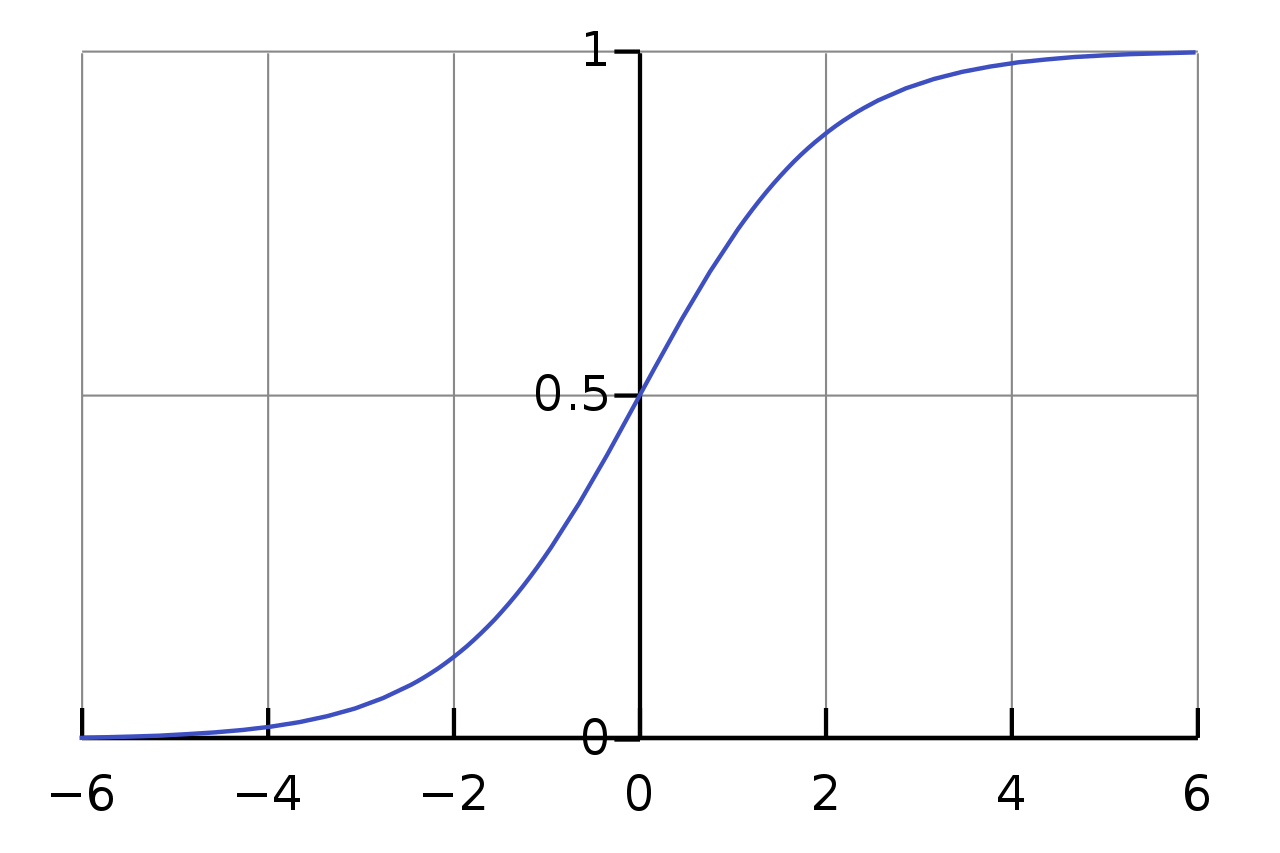

The equation of the sigmoid function looks like this:

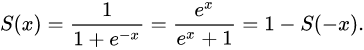

Thus far these are machine learning and data science concepts, but how do these concepts relate to neural networks?  Next let's look at one of the most simple neural networks.

The following is a perceptron:

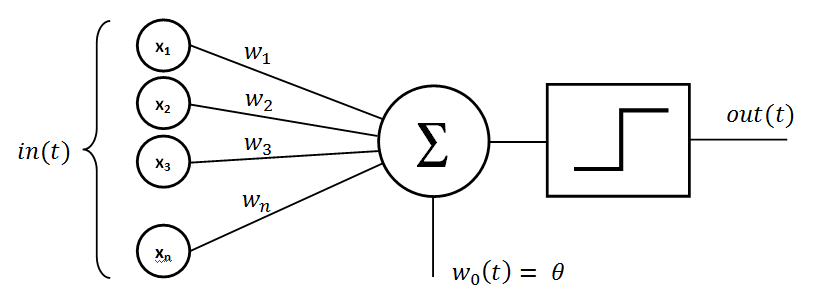

The perceptron works by multiplying the input vector components by the weighting factors and note that the bias term is included in the sum.  What one should recognize at this point is that this part up to and including the sum, is nothing other than a linear combination, or in other words, the linear regression model we began with above, or in other words the dot product between two vectors x and w.  The next step is that the output sum is input into a step, or sigmoid function, and then the output is either a 0 or a 1.  So this perceptron is a binary linear classifier.

How can this neural network be improved?

Next, we look at a feed forward neural network with a so-called "hidden layer"

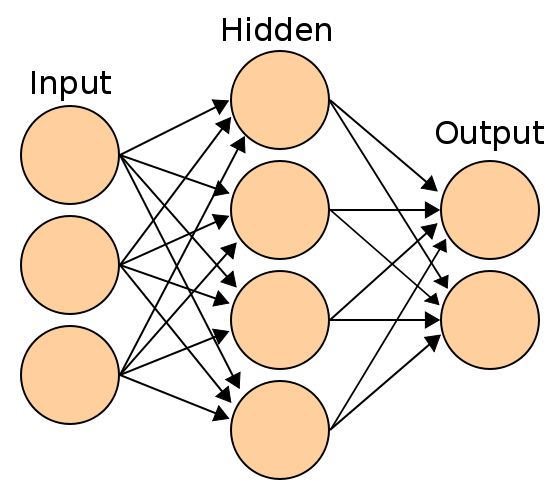

Above, we have been using python dictionaries to store our dataset.  Python dictionaries are not the best way to do data science.  So we can convert the data points to a matrix.  We first need to get rid of the labels which are called keys in python dictionaries.

In [28]:
dp1 = { 'partno': 100, 'maxtemp': 35, 'mintemp': 35, 'maxvibration': 12, 'asperity': 0.32}
dp2 = { 'partno': 101, 'maxtemp': 46, 'mintemp': 35, 'maxvibration': 21, 'asperity': 0.34}
dp3 = { 'partno': 130, 'maxtemp': 56, 'mintemp': 46, 'maxvibration': 3412, 'asperity': 12.42}
dp4 = { 'partno': 131, 'maxtemp': 58, 'mintemp': 48, 'maxvibration': 3542, 'asperity': 13.43}

In [29]:
x1 = [v for k, v in dp1.items()]

This will turn each data point (which is represented as an individual dictionary above) into an array.

In [30]:
x1

[100, 35, 35, 12, 0.32]

Also, we do not need the asperity or the part number any more.

In [31]:
x1 = [v for k, v in dp1.items()] [1:-1]

In [32]:
x1

[35, 35, 12]

But remember that we have to align this array to the size of the weight vector so we  have to add a 1 to the beginning, to support the bias term.

In [33]:
x1 = [1] + [v for k, v in dp1.items()] [1:-1]

In [34]:
x1

[1, 35, 35, 12]

Now Python arrays are slow, and also do not support linear algebra operations very well, so we want to change this into a numpy array:

In [35]:
import numpy as np

x1 = np.array([1] + [v for k, v in dp1.items()] [1:-1])

In [36]:
x1

array([ 1, 35, 35, 12])

In [37]:
x2 = np.array([1] + [v for k, v in dp2.items()] [1:-1])
x3 = np.array([1] + [v for k, v in dp3.items()] [1:-1])
x4 = np.array([1] + [v for k, v in dp4.items()] [1:-1])

In [38]:
x2

array([ 1, 46, 35, 21])

In [39]:
x3

array([   1,   56,   46, 3412])

In [40]:
x4

array([   1,   58,   48, 3542])

We create a function called neuron which computes the logistic function for just one data point.  We define a weight vector called w_layer1 which we initialize randomly.  The function neuron first computes the dot product between the vector x and the weight vector.  Then it finds the sigmoid as the activation function and then the function neuron is done. 

In [41]:
w_layer1 = np.random.rand(4)

def neuron(x):
    return sigmoid( x.dot(w_layer1) )

In [42]:
neuron(x1)

0.9999999439958596

Note that we are not getting anything useful here because we randomly initialized the weight vector, meaning we did not train it.

In [43]:
neuron(x2)

0.9999999929955976

In [44]:
neuron(x3)

1.0

In [45]:
neuron(x4)

1.0

The definition of 'training' here means that we are updating the weight vector.

Now we are going to change the function a bit to compute all data points in parallel. First we have to change the sigmoid function so that it takes multiple values at once.  We can do that easily using numpy.

In [46]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

We have to change our weights from vectors to matrix as well.

In [47]:
w_layer1 = np.random.rand(4,4)

def layer1(x):
    return sigmoid( x.dot(w_layer1) )

Next, need to create a matrix from the input data.  A nested array is the same thing as a matrix, using numpy.

In [48]:
x = np.array([x1, x2, x3, x4])

In [49]:
x

array([[   1,   35,   35,   12],
       [   1,   46,   35,   21],
       [   1,   56,   46, 3412],
       [   1,   58,   48, 3542]])

In [50]:
layer1(x)

array([[1.        , 1.        , 0.99957759, 1.        ],
       [1.        , 1.        , 0.99998969, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ]])

Creating a second layer:

In [51]:
w_layer2 = np.random.rand(4,4)

def layer2(x):
    return sigmoid( x.dot(w_layer2) )

In [52]:
layer2(layer1(x))

array([[0.73666589, 0.86803944, 0.68558057, 0.86061033],
       [0.73667811, 0.8680506 , 0.68559871, 0.86062817],
       [0.73667841, 0.86805087, 0.68559917, 0.86062861],
       [0.73667841, 0.86805087, 0.68559917, 0.86062861]])

We stack these two computations on top of each other, and we have completed our first feed forward neural network.  Of course the predicted values are incorrect, since we are using randomly initialized weight matrixes.  So this is now an untrained feed forward neural network. 

Note that a single hidden layer neural network is capable of representing **any** mathematical function.

[end]